# Visualization

In [1]:
#!pip install cooltools==0.7.0
#!pip install seaborn
#!pip install cooler
#!pip install pybbi

## Insulation & boundaries

In [1]:
# import core packages
import warnings
warnings.filterwarnings("ignore")
from itertools import combinations
import os

# import semi-core packages
import matplotlib.pyplot as plt
from matplotlib import colors
%matplotlib inline
plt.style.use('seaborn-v0_8-poster')
import numpy as np
import pandas as pd
from multiprocessing import Pool

# import open2c libraries
import bioframe

import cooler
import cooltools

from packaging import version
if version.parse(cooltools.__version__) < version.parse('0.5.2'):
    raise AssertionError("tutorial relies on cooltools version 0.5.2 or higher,"+
                         "please check your cooltools version and update to the latest")

# count cpus
num_cpus = os.getenv('SLURM_CPUS_PER_TASK')
if not num_cpus:
    num_cpus = os.cpu_count()
num_cpus = int(num_cpus)
print(num_cpus)

8


In [2]:
#!pip install --force-reinstall matplotlib==3.8
#!pip install cython

# import standard python libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

# Import python package for working with cooler files and tools for analysis
import cooler
import cooltools.lib.plotting

import os
import cooltools
from cooltools import insulation
print(os.getcwd())

/Volumes/UKJIN_SSD/Genomics_03_Analysis_Working/data_vault_2024summer_microC/source/TAD


### Calculating genome-wide contact insulation

In [3]:
outDir = '../../figure/TAD'
os.makedirs(outDir, exist_ok=True)
dataDir = '../../result/TAD'

In [4]:
# Import mcool files
coolDir = '../../cool/norm'
res = 25
clr_G1DMSO = cooler.Cooler(os.path.join(coolDir, 'G1.DMSO.Merged_' + str(res) + 'kb_KR.cool'))

# Import mcool files
#file_G1DMSO = '../../mcool/G1.DMSO.Merged.mcool'

In [9]:
clr_G1DMSO.bins[:3

In [6]:
# Functions to help with plotting
def pcolormesh_45deg(ax, matrix_c, start=0, resolution=1, *args, **kwargs):
    start_pos_vector = [start+resolution*i for i in range(len(matrix_c)+1)]
    import itertools
    n = matrix_c.shape[0]
    t = np.array([[1, 0.5], [-1, 0.5]])
    matrix_a = np.dot(np.array([(i[1], i[0])
                                for i in itertools.product(start_pos_vector[::-1],
                                                           start_pos_vector)]), t)
    x = matrix_a[:, 1].reshape(n + 1, n + 1)
    y = matrix_a[:, 0].reshape(n + 1, n + 1)
    im = ax.pcolormesh(x, y, np.flipud(matrix_c), *args, **kwargs)
    im.set_rasterized(True)
    return im

from matplotlib.ticker import EngFormatter
bp_formatter = EngFormatter('b')
def format_ticks(ax, x=True, y=True, rotate=True):
    if y:
        ax.yaxis.set_major_formatter(bp_formatter)
    if x:
        ax.xaxis.set_major_formatter(bp_formatter)
        ax.xaxis.tick_bottom()
    if rotate:
        ax.tick_params(axis='x',rotation=45)

In [5]:
# Custom insulation 
# Calculating insulation score
#windows = [3*res*1000, 5*res*1000, 10*res*1000]
windows = [5*res*1000]

insulation_table_G1DMSO = insulation(clr_G1DMSO, windows, verbose=True, ignore_diags=2, nproc = 10)
insulation_table_G1DMSO.to_csv(os.path.join(dataDir, 'TAD_boundaries_25kb_G1DMSO.tsv'), sep = '\t', index = False)

INFO:root:creating a Pool of 10 workers
INFO:root:Processing region chr1
INFO:root:Processing region chr5
INFO:root:Processing region chr3
INFO:root:Processing region chr2
INFO:root:Processing region chr7
INFO:root:Processing region chr10
INFO:root:Processing region chr6
INFO:root:Processing region chr8
INFO:root:Processing region chr4
INFO:root:Processing region chr9
INFO:root:Processing region chr11
INFO:root:Processing region chr12
INFO:root:Processing region chr13
INFO:root:Processing region chr14
INFO:root:Processing region chr15
INFO:root:Processing region chr16
INFO:root:Processing region chr17
INFO:root:Processing region chr18
INFO:root:Processing region chr19
INFO:root:Processing region chrM
INFO:root:Processing region chrX
INFO:root:Processing region chrY


,chrom,start,end,region,is_bad_bin,log2_insulation_score_125000,n_valid_pixels_125000,boundary_strength_125000,is_boundary_125000
0,chr1,0,25000,chr1,False,NaN,3.0,NaN,False
1,chr1,25000,50000,chr1,False,NaN,7.0,NaN,False
2,chr1,50000,75000,chr1,False,NaN,12.0,NaN,False
3,chr1,75000,100000,chr1,False,NaN,17.0,NaN,False
4,chr1,100000,125000,chr1,False,NaN,22.0,NaN,False
...,...,...,...,...,...,...,...,...,...
109028,chrY,91625000,91650000,chrY,False,NaN,22.0,NaN,False
109029,chrY,91650000,91675000,chrY,False,NaN,17.0,NaN,False
109030,chrY,91675000,91700000,chrY,False,NaN,12.0,NaN,False
109031,chrY,91700000,91725000,chrY,False,NaN,7.0,NaN,False


In [18]:
first_window_summary =insulation_table_G1DMSO.columns[[ str(windows[-1]) in i for i in insulation_table_G1DMSO.columns]]

insulation_table_G1DMSO[['chrom','start','end','region','is_bad_bin']+list(first_window_summary)].iloc[1000:1005]


,chrom,start,end,region,is_bad_bin,log2_insulation_score_250000,n_valid_pixels_250000,boundary_strength_250000,is_boundary_250000
1000,chr1,25000000,25025000,chr1,False,0.198402,97.0,NaN,False
1001,chr1,25025000,25050000,chr1,False,0.226923,97.0,NaN,False
1002,chr1,25050000,25075000,chr1,False,0.289358,97.0,NaN,False
1003,chr1,25075000,25100000,chr1,False,0.323217,97.0,NaN,False
1004,chr1,25100000,25125000,chr1,False,0.347091,97.0,NaN,False


In [19]:
# Applying Li & Otsu threshold to insulation strength
from skimage.filters import threshold_li, threshold_otsu

# NA value need to be masked for threshold functions since Otsu cannot handle NA
threshold_func_li = lambda x: threshold_li(x[np.isfinite(x)])
thresholding_func_li = lambda x: x >= threshold_func_li(x)
threshold_func_otsu = lambda x: threshold_otsu(x[np.isfinite(x)])
thresholding_func_otsu = lambda x: x >= threshold_func_otsu(x)


In [20]:
tables = [insulation_table_G1DMSO]

for table in tables:
    for win in windows:
        strong_boundaries = thresholding_func_li(table[f"boundary_strength_{win}"].values)
        table[f"is_boundary_{win}_li"] = strong_boundaries
        strong_boundaries = thresholding_func_otsu(table[f"boundary_strength_{win}"].values)
        table[f"is_boundary_{win}_otsu"] = strong_boundaries

In [21]:
# Checking the cutoff
for table in tables:
    for win in windows:
        n_boundaries = table[f'is_boundary_{win}'].sum()
        n_boundaries_li = table[f'is_boundary_{win}_li'].sum()
        n_boundaries_otsu = table[f'is_boundary_{win}_otsu'].sum()
        print(n_boundaries, n_boundaries_li, n_boundaries_otsu)

6878 6878 3934
5178 5178 3242
3533 3533 2178


In [25]:
# Save the tiable
insulation_table_G1DMSO.to_csv(os.path.join(dataDir, 'TAD_boundaries_25kb_G1DMSO.tsv'), sep = '\t', index = False)

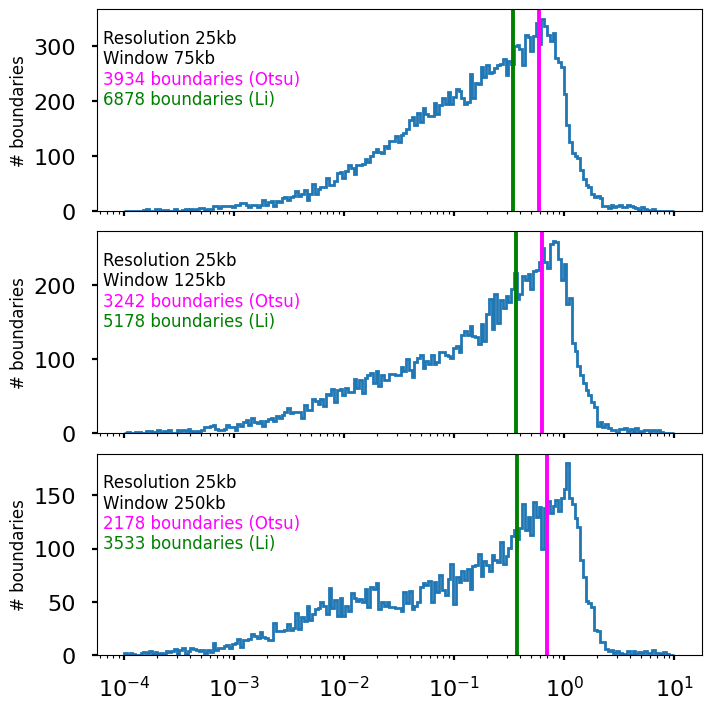

In [26]:
# Visualize insulation score and threshold with histogram

## PARAMETERS
histkwargs = dict(
    bins=10**np.linspace(-4,1,200
),
    histtype='step',
    lw=2,
)
thresholds_li = {}
thresholds_otsu = {}

## PLOTTING
# List of tables and their names
tables = [
    ("G1DMSO", insulation_table_G1DMSO)
]

# Plotting
for table_name, table in tables:
    f, axs = plt.subplots(len(windows), 1, sharex=True, figsize=(7, 7), constrained_layout=True)
    
    # Ensure axs is iterable
    if len(windows) == 1:
        axs = [axs]
    for i, (win, ax) in enumerate(zip(windows, axs)):
        ax.hist(
            table[f'boundary_strength_{win}'],
            **histkwargs
        )
        thresholds_li[win] = threshold_func_li(table[f"boundary_strength_{win}"].values)
        thresholds_otsu[win] = threshold_func_otsu(table[f"boundary_strength_{win}"].values)
        n_boundaries_li = (table[f'is_boundary_{win}_li']).sum()
        n_boundaries_otsu = (table[f'is_boundary_{win}_otsu']).sum()
        ax.axvline(thresholds_li[win], c='green')
        ax.axvline(thresholds_otsu[win], c='magenta')
        ax.text(0.01, 0.9,
                f'Resolution {res}kb',
                ha='left',
                va='top',
                transform=ax.transAxes)
        ax.text(0.01, 0.8,
                f'Window {win // 1000}kb',
                ha='left',
                va='top',
                transform=ax.transAxes)
        ax.text(0.01, 0.7,
                f'{n_boundaries_otsu} boundaries (Otsu)',
                c='magenta',
                ha='left',
                va='top',
                transform=ax.transAxes)
        ax.text(0.01, 0.6,
                f'{n_boundaries_li} boundaries (Li)',
                c='green',
                ha='left',
                va='top',
                transform=ax.transAxes)
        ax.set(
            xscale='log',
            ylabel='# boundaries'
        )
    for ax in axs:
        ax.set_ylabel('# boundaries', fontsize=12)
        
    f.savefig(os.path.join(outDir, f'Insulation_threshold_histogram_{table_name}_25kb.svg'), format='svg')
    f.savefig(os.path.join(outDir, f'Insulation_threshold_histogram_{table_name}_25kb.png'), format='png')

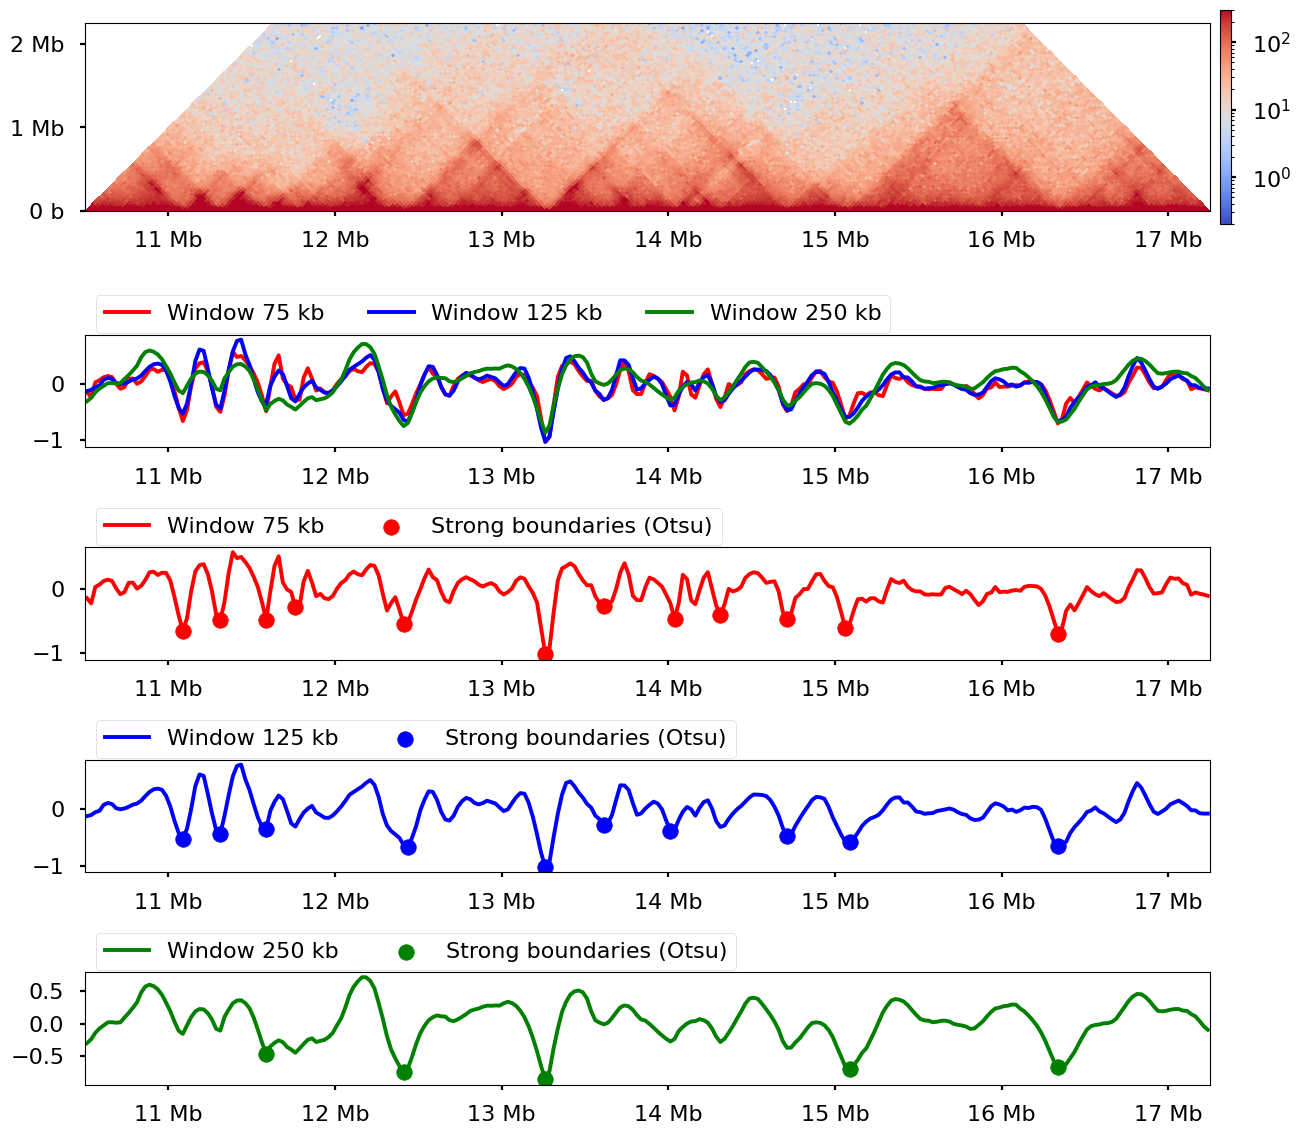

In [27]:
# Visualizing TAD boundaries along with HiC matrix
from matplotlib.colors import LogNorm
from mpl_toolkits.axes_grid1 import make_axes_locatable
import bioframe

# PARAMETERS
plt.rcParams['font.size'] = 12
clr = clr_G1DMSO
insulation_table = insulation_table_G1DMSO
start = 10_500_000
end = start+ 90*windows[0]
region = ('chr2', start, end)
norm = LogNorm(vmax=300, vmin=0.2)
data = clr.matrix(balance=True).fetch(region)

# Plotting matrix
f, ax = plt.subplots(figsize=(15, 15))
im = pcolormesh_45deg(ax, data, start=region[1], resolution=res*1000, norm=norm, cmap='coolwarm')
ax.set_aspect(0.5)
ax.set_ylim(0, 30*windows[0])
format_ticks(ax, rotate=False)
divider = make_axes_locatable(ax)
cax = divider.append_axes("right", size="1%", pad=0.1, aspect=6)
plt.colorbar(im, cax=cax)

# Plotting all insulation score
insul_region = bioframe.select(insulation_table, region)
ins_ax = divider.append_axes("bottom", size="30%", pad=0.3, sharex=ax)
format_ticks(ins_ax, y=False, rotate=False)
ax.set_xlim(region[1], region[2])

colors = ['red', 'blue', 'green', 'orange', 'purple']

for i in (0, 1, 2):
    winSize = windows[i]
    ins_ax.plot(insul_region[['start', 'end']].mean(axis=1), insul_region[f'log2_insulation_score_{winSize}'], label=f'Window {winSize//1000} kb', color=colors[i])
ins_ax.legend(bbox_to_anchor=(0., 1.45), loc='upper left', ncol=4);

# Plotting each boundaries
for i in (0, 1, 2):
    ins_ax = divider.append_axes("bottom", size="30%", pad=1, sharex=ax)
    ins_ax.plot(insul_region[['start', 'end']].mean(axis=1),
                insul_region['log2_insulation_score_'+str(windows[i])],
                label=f'Window {(windows[i])//1000} kb',
               color=colors[i])
    boundaries = insul_region[~np.isnan(insul_region[f'boundary_strength_{windows[i]}'])]
    strong_boundaries = boundaries[boundaries[f'is_boundary_{windows[i]}_otsu']]
    ins_ax.scatter(strong_boundaries[['start', 'end']].mean(axis=1),
                strong_boundaries[f'log2_insulation_score_{windows[i]}'], label='Strong boundaries (Otsu)',
                  color=colors[i])
    ins_ax.legend(bbox_to_anchor=(0., 1.45), loc='upper left', ncol=4)

f.savefig(os.path.join(outDir, 'Insulation_threshold_matrix_25kb.svg'), format = 'svg')
f.savefig(os.path.join(outDir, 'Insulation_threshold_matrix_25kb.png'), format = 'png')

### Checking CTCF & RAD21 enrichment at boundaries

In [28]:
import bbi

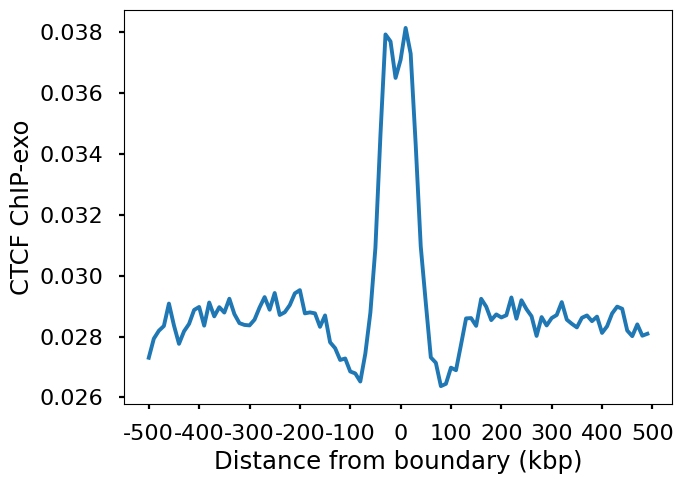

In [29]:
resolution = 25000
flank = 500000 # Length of flank to one side from the boundary, in basepairs
nbins = 100   # Number of bins to split the region
top_boundaries = insulation_table[insulation_table['is_boundary_125000_otsu']]
stackup = bbi.stackup('../../reference/33248_CTCF_07-729_Bruce-4_trim_q20_dedup_black_depthNorm_bin50bp.bw',
                      top_boundaries.chrom,
                      top_boundaries.start+resolution//2-flank,
                      top_boundaries.start+resolution//2+flank,
                      bins=nbins)
f, ax = plt.subplots(figsize=[7,5])
ax.plot(np.nanmean(stackup, axis=0) )
ax.set(xticks=np.arange(0, nbins+1, 10),
       xticklabels=[f'{int(x):,}' for x in (np.arange(0, nbins+1, 10)-nbins//2)*flank*2/nbins/1000],
       xlabel='Distance from boundary (kbp)',
       ylabel='CTCF ChIP-exo');
# Adjust layout to avoid cutting off elements
plt.tight_layout()

# Save the figure with tight bounding box
f.savefig(os.path.join(outDir, 'metaplot_25kb_125kb_CTCF.png'), format='png', bbox_inches='tight')
f.savefig(os.path.join(outDir, 'metaplot_25kb_125kb_CTCF.svg'), format='svg', bbox_inches='tight')

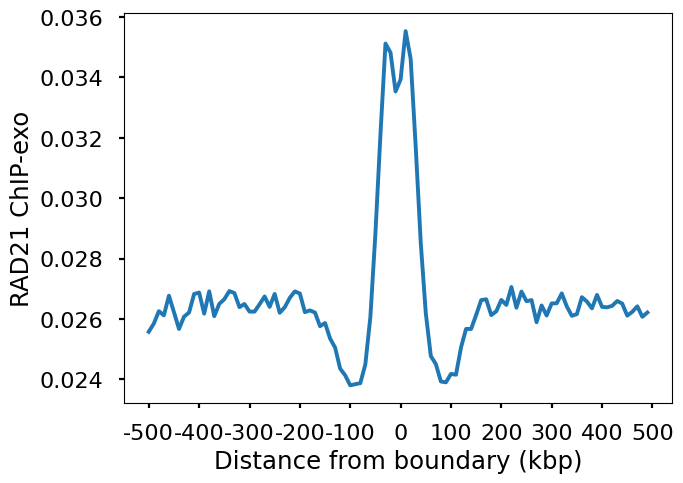

In [30]:
resolution = 25000
flank = 500000 # Length of flank to one side from the boundary, in basepairs
nbins = 100   # Number of bins to split the region
top_boundaries = insulation_table[insulation_table['is_boundary_125000_otsu']]
stackup = bbi.stackup('../../reference/33250_RAD21_ab992_Bruce-4_trim_q20_dedup_black_depthNorm_bin50bp.bw',
                      top_boundaries.chrom,
                      top_boundaries.start+resolution//2-flank,
                      top_boundaries.start+resolution//2+flank,
                      bins=nbins)
f, ax = plt.subplots(figsize=[7,5])
ax.plot(np.nanmean(stackup, axis=0) )
ax.set(xticks=np.arange(0, nbins+1, 10),
       xticklabels=[f'{int(x):,}' for x in (np.arange(0, nbins+1, 10)-nbins//2)*flank*2/nbins/1000],
       xlabel='Distance from boundary (kbp)',
       ylabel='RAD21 ChIP-exo');
# Adjust layout to avoid cutting off elements
plt.tight_layout()

# Save the figure with tight bounding box
f.savefig(os.path.join(outDir, 'metaplot_25kb_125kb_RAD21.png'), format='png', bbox_inches='tight')
f.savefig(os.path.join(outDir, 'metaplot_25kb_125kb_RAD21.svg'), format='svg', bbox_inches='tight')

# CALLING TAD FOR ASYNC MICRO-C

INFO:root:creating a Pool of 10 workers
INFO:root:Processing region chr4
INFO:root:Processing region chr5
INFO:root:Processing region chr3
INFO:root:Processing region chr6
INFO:root:Processing region chr1
INFO:root:Processing region chr2
INFO:root:Processing region chr9
INFO:root:Processing region chr7
INFO:root:Processing region chr8
INFO:root:Processing region chr10
INFO:root:Processing region chr11
INFO:root:Processing region chr12
INFO:root:Processing region chr13
INFO:root:Processing region chr14
INFO:root:Processing region chr15
INFO:root:Processing region chr16
INFO:root:Processing region chr17
INFO:root:Processing region chr18
INFO:root:Processing region chr19
INFO:root:Processing region chrM
INFO:root:Processing region chrX
INFO:root:Processing region chrY


5427 5427 3313


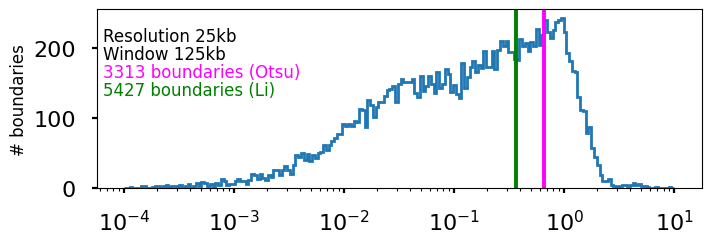

In [31]:
outDir = '../../figure/TAD'
os.makedirs(outDir, exist_ok=True)

# Import mcool files
coolDir = '../../cool/norm'
res = 25
clr_G1DMSO = cooler.Cooler(os.path.join(coolDir, 'GSE178982_Async-RAD21-UT_pool_' + str(res) + 'kb_KR.cool'))

# Import mcool files
#file_G1DMSO = '../../mcool/G1.DMSO.Merged.mcool'

# Custom insulation 
# Calculating insulation score
windows = [5*res*1000]

insulation_table_G1DMSO = insulation(clr_G1DMSO, windows, verbose=True, ignore_diags=2, nproc = 10)

# Applying Li & Otsu threshold to insulation strength
from skimage.filters import threshold_li, threshold_otsu

# NA value need to be masked for threshold functions since Otsu cannot handle NA
threshold_func_li = lambda x: threshold_li(x[np.isfinite(x)])
thresholding_func_li = lambda x: x >= threshold_func_li(x)
threshold_func_otsu = lambda x: threshold_otsu(x[np.isfinite(x)])
thresholding_func_otsu = lambda x: x >= threshold_func_otsu(x)

tables = [insulation_table_G1DMSO]

for table in tables:
    for win in windows:
        strong_boundaries = thresholding_func_li(table[f"boundary_strength_{win}"].values)
        table[f"is_boundary_{win}_li"] = strong_boundaries
        strong_boundaries = thresholding_func_otsu(table[f"boundary_strength_{win}"].values)
        table[f"is_boundary_{win}_otsu"] = strong_boundaries

        # Checking the cutoff
for table in tables:
    for win in windows:
        n_boundaries = table[f'is_boundary_{win}'].sum()
        n_boundaries_li = table[f'is_boundary_{win}_li'].sum()
        n_boundaries_otsu = table[f'is_boundary_{win}_otsu'].sum()
        print(n_boundaries, n_boundaries_li, n_boundaries_otsu)

        # Visualize insulation score and threshold with histogram

insulation_table_G1DMSO.to_csv(os.path.join(dataDir, 'TAD_boundaries_25kb_AsyncUT.tsv'), sep = '\t', index = False)
## PARAMETERS
histkwargs = dict(
    bins=10**np.linspace(-4,1,200
),
    histtype='step',
    lw=2,
)
thresholds_li = {}
thresholds_otsu = {}

## PLOTTING
# List of tables and their names
tables = [
    ("AsyncUT", insulation_table_G1DMSO)
]

# Plotting
for table_name, table in tables:
    f, axs = plt.subplots(len(windows), 1, sharex=True, figsize=(7, 7/3), constrained_layout=True)
    
    # Ensure axs is iterable
    if len(windows) == 1:
        axs = [axs]
    for i, (win, ax) in enumerate(zip(windows, axs)):
        ax.hist(
            table[f'boundary_strength_{win}'],
            **histkwargs
        )
        thresholds_li[win] = threshold_func_li(table[f"boundary_strength_{win}"].values)
        thresholds_otsu[win] = threshold_func_otsu(table[f"boundary_strength_{win}"].values)
        n_boundaries_li = (table[f'is_boundary_{win}_li']).sum()
        n_boundaries_otsu = (table[f'is_boundary_{win}_otsu']).sum()
        ax.axvline(thresholds_li[win], c='green')
        ax.axvline(thresholds_otsu[win], c='magenta')
        ax.text(0.01, 0.9,
                f'Resolution {res}kb',
                ha='left',
                va='top',
                transform=ax.transAxes)
        ax.text(0.01, 0.8,
                f'Window {win // 1000}kb',
                ha='left',
                va='top',
                transform=ax.transAxes)
        ax.text(0.01, 0.7,
                f'{n_boundaries_otsu} boundaries (Otsu)',
                c='magenta',
                ha='left',
                va='top',
                transform=ax.transAxes)
        ax.text(0.01, 0.6,
                f'{n_boundaries_li} boundaries (Li)',
                c='green',
                ha='left',
                va='top',
                transform=ax.transAxes)
        ax.set(
            xscale='log',
            ylabel='# boundaries'
        )
    for ax in axs:
        ax.set_ylabel('# boundaries', fontsize=12)
        
    f.savefig(os.path.join(outDir, f'Insulation_threshold_histogram_{table_name}_25kb.svg'), format='svg')
    f.savefig(os.path.join(outDir, f'Insulation_threshold_histogram_{table_name}_25kb.png'), format='png')

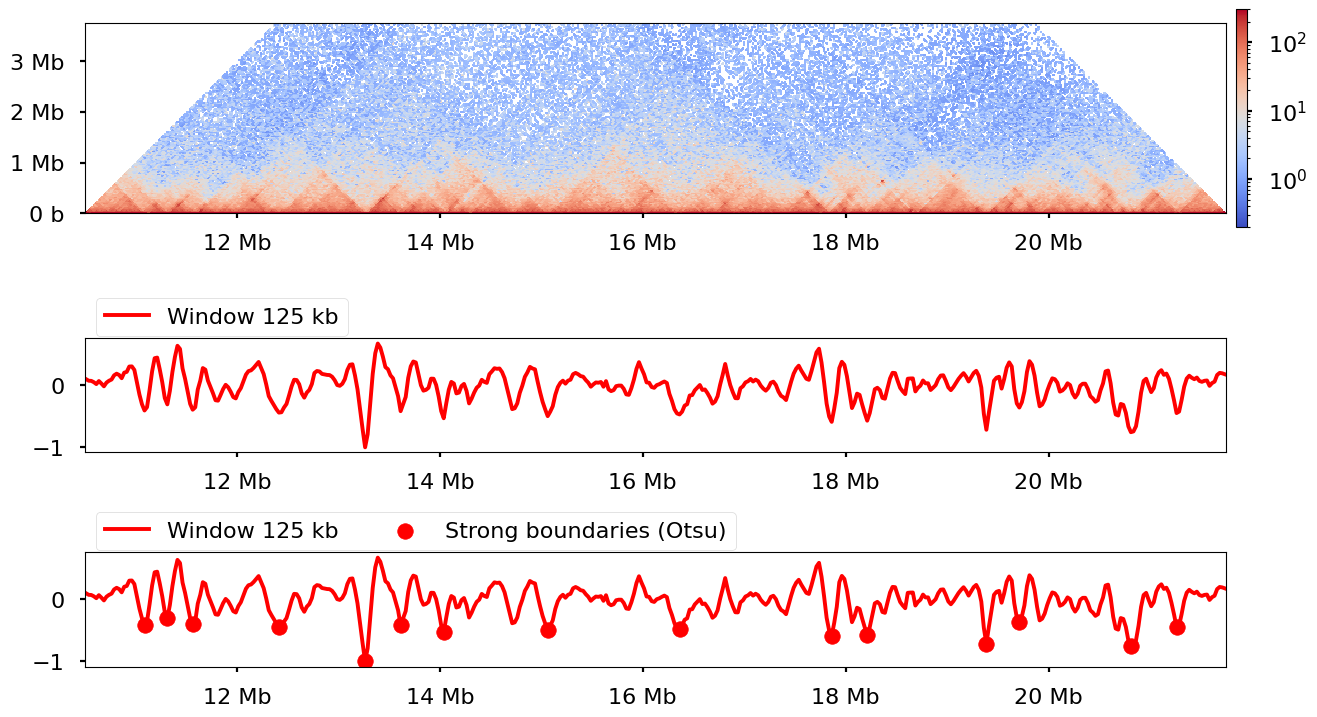

In [32]:
# Visualizing TAD boundaries along with HiC matrix
from matplotlib.colors import LogNorm
from mpl_toolkits.axes_grid1 import make_axes_locatable
import bioframe

# PARAMETERS
plt.rcParams['font.size'] = 12
clr = clr_G1DMSO
insulation_table = insulation_table_G1DMSO
start = 10_500_000
end = start+ 90*windows[0]
region = ('chr2', start, end)
norm = LogNorm(vmax=300, vmin=0.2)
data = clr.matrix(balance=True).fetch(region)

# Plotting matrix
f, ax = plt.subplots(figsize=(15, 15))
im = pcolormesh_45deg(ax, data, start=region[1], resolution=res*1000, norm=norm, cmap='coolwarm')
ax.set_aspect(0.5)
ax.set_ylim(0, 30*windows[0])
format_ticks(ax, rotate=False)
divider = make_axes_locatable(ax)
cax = divider.append_axes("right", size="1%", pad=0.1, aspect=6)
plt.colorbar(im, cax=cax)

# Plotting all insulation score
insul_region = bioframe.select(insulation_table, region)
ins_ax = divider.append_axes("bottom", size="30%", pad=0.3, sharex=ax)
format_ticks(ins_ax, y=False, rotate=False)
ax.set_xlim(region[1], region[2])

colors = ['red', 'blue', 'green', 'orange', 'purple']

i = 0
winSize = windows[i]
ins_ax.plot(insul_region[['start', 'end']].mean(axis=1), insul_region[f'log2_insulation_score_{winSize}'], label=f'Window {winSize//1000} kb', color=colors[i])
ins_ax.legend(bbox_to_anchor=(0., 1.45), loc='upper left', ncol=4);

# Plotting each boundaries

ins_ax = divider.append_axes("bottom", size="30%", pad=1, sharex=ax)
ins_ax.plot(insul_region[['start', 'end']].mean(axis=1),
            insul_region['log2_insulation_score_'+str(windows[i])],
            label=f'Window {(windows[i])//1000} kb',
           color=colors[i])
boundaries = insul_region[~np.isnan(insul_region[f'boundary_strength_{windows[i]}'])]
strong_boundaries = boundaries[boundaries[f'is_boundary_{windows[i]}_otsu']]
ins_ax.scatter(strong_boundaries[['start', 'end']].mean(axis=1),
            strong_boundaries[f'log2_insulation_score_{windows[i]}'], label='Strong boundaries (Otsu)',
              color=colors[i])
ins_ax.legend(bbox_to_anchor=(0., 1.45), loc='upper left', ncol=4)

f.savefig(os.path.join(outDir, 'Insulation_threshold_matrix_AsyncUT_25kb.svg'), format = 'svg')
f.savefig(os.path.join(outDir, 'Insulation_threshold_matrix_AsyncUT_25kb.png'), format = 'png')

# Calling TAD for Dylan EpiLC HiC

INFO:root:creating a Pool of 10 workers
INFO:root:Processing region chr1
INFO:root:Processing region chr2
INFO:root:Processing region chr3
INFO:root:Processing region chr6
INFO:root:Processing region chr5
INFO:root:Processing region chr4
INFO:root:Processing region chr9
INFO:root:Processing region chr7
INFO:root:Processing region chr10
INFO:root:Processing region chr8
INFO:root:Processing region chr11
INFO:root:Processing region chr12
INFO:root:Processing region chr13
INFO:root:Processing region chr14
INFO:root:Processing region chr15
INFO:root:Processing region chr16
INFO:root:Processing region chr17
INFO:root:Processing region chr18
INFO:root:Processing region chr19
INFO:root:Processing region chrM
INFO:root:Processing region chrX
INFO:root:Processing region chrY


5825 5825 3701


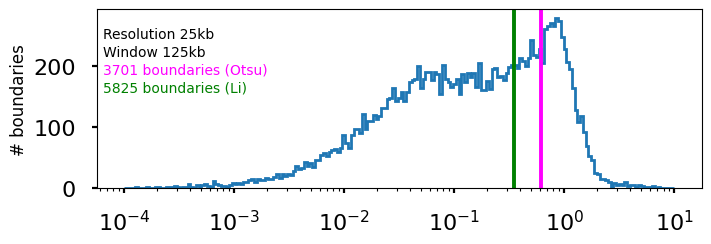

In [4]:
outDir = '../../figure/TAD'
os.makedirs(outDir, exist_ok=True)

# Import mcool files
coolDir = '../../cool/norm'
res = 25
clr_G1DMSO = cooler.Cooler(os.path.join(coolDir, 'Dylan_Async.EpiLC_' + str(res) + 'kb_KR.cool'))

# Import mcool files
#file_G1DMSO = '../../mcool/G1.DMSO.Merged.mcool'

# Custom insulation 
# Calculating insulation score
windows = [5*res*1000]

insulation_table_G1DMSO = insulation(clr_G1DMSO, windows, verbose=True, ignore_diags=2, nproc = 10)

# Applying Li & Otsu threshold to insulation strength
from skimage.filters import threshold_li, threshold_otsu

# NA value need to be masked for threshold functions since Otsu cannot handle NA
threshold_func_li = lambda x: threshold_li(x[np.isfinite(x)])
thresholding_func_li = lambda x: x >= threshold_func_li(x)
threshold_func_otsu = lambda x: threshold_otsu(x[np.isfinite(x)])
thresholding_func_otsu = lambda x: x >= threshold_func_otsu(x)

tables = [insulation_table_G1DMSO]

for table in tables:
    for win in windows:
        strong_boundaries = thresholding_func_li(table[f"boundary_strength_{win}"].values)
        table[f"is_boundary_{win}_li"] = strong_boundaries
        strong_boundaries = thresholding_func_otsu(table[f"boundary_strength_{win}"].values)
        table[f"is_boundary_{win}_otsu"] = strong_boundaries

        # Checking the cutoff
for table in tables:
    for win in windows:
        n_boundaries = table[f'is_boundary_{win}'].sum()
        n_boundaries_li = table[f'is_boundary_{win}_li'].sum()
        n_boundaries_otsu = table[f'is_boundary_{win}_otsu'].sum()
        print(n_boundaries, n_boundaries_li, n_boundaries_otsu)

        # Visualize insulation score and threshold with histogram

insulation_table_G1DMSO.to_csv(os.path.join(dataDir, 'TAD_boundaries_25kb_DylanEpiLC.tsv'), sep = '\t', index = False)
## PARAMETERS
histkwargs = dict(
    bins=10**np.linspace(-4,1,200
),
    histtype='step',
    lw=2,
)
thresholds_li = {}
thresholds_otsu = {}

## PLOTTING
# List of tables and their names
tables = [
    ("DylanEpiLC", insulation_table_G1DMSO)
]

# Plotting
for table_name, table in tables:
    f, axs = plt.subplots(len(windows), 1, sharex=True, figsize=(7, 7/3), constrained_layout=True)
    
    # Ensure axs is iterable
    if len(windows) == 1:
        axs = [axs]
    for i, (win, ax) in enumerate(zip(windows, axs)):
        ax.hist(
            table[f'boundary_strength_{win}'],
            **histkwargs
        )
        thresholds_li[win] = threshold_func_li(table[f"boundary_strength_{win}"].values)
        thresholds_otsu[win] = threshold_func_otsu(table[f"boundary_strength_{win}"].values)
        n_boundaries_li = (table[f'is_boundary_{win}_li']).sum()
        n_boundaries_otsu = (table[f'is_boundary_{win}_otsu']).sum()
        ax.axvline(thresholds_li[win], c='green')
        ax.axvline(thresholds_otsu[win], c='magenta')
        ax.text(0.01, 0.9,
                f'Resolution {res}kb',
                ha='left',
                va='top',
                transform=ax.transAxes)
        ax.text(0.01, 0.8,
                f'Window {win // 1000}kb',
                ha='left',
                va='top',
                transform=ax.transAxes)
        ax.text(0.01, 0.7,
                f'{n_boundaries_otsu} boundaries (Otsu)',
                c='magenta',
                ha='left',
                va='top',
                transform=ax.transAxes)
        ax.text(0.01, 0.6,
                f'{n_boundaries_li} boundaries (Li)',
                c='green',
                ha='left',
                va='top',
                transform=ax.transAxes)
        ax.set(
            xscale='log',
            ylabel='# boundaries'
        )
    for ax in axs:
        ax.set_ylabel('# boundaries', fontsize=12)
        
    f.savefig(os.path.join(outDir, f'Insulation_threshold_histogram_{table_name}_25kb.svg'), format='svg')
    f.savefig(os.path.join(outDir, f'Insulation_threshold_histogram_{table_name}_25kb.png'), format='png')

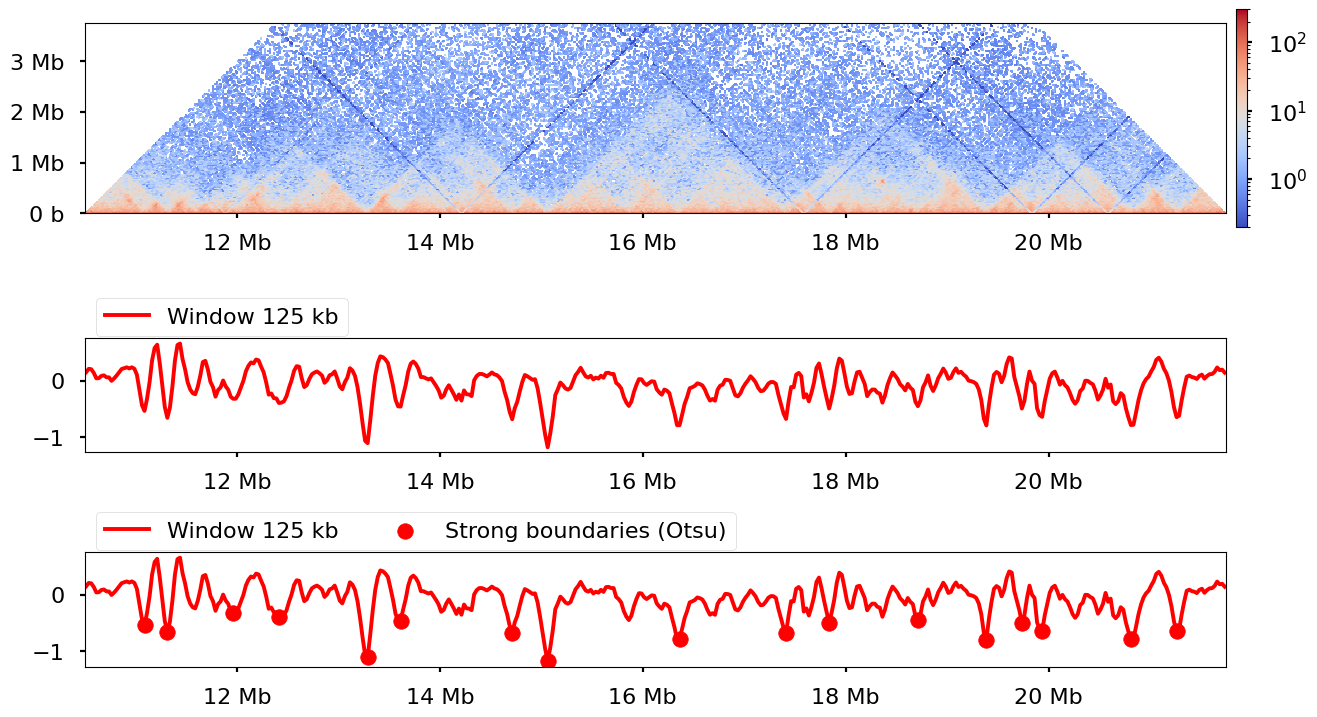

In [7]:
# Visualizing TAD boundaries along with HiC matrix
from matplotlib.colors import LogNorm
from mpl_toolkits.axes_grid1 import make_axes_locatable
import bioframe

# PARAMETERS
plt.rcParams['font.size'] = 12
clr = clr_G1DMSO
insulation_table = insulation_table_G1DMSO
start = 10_500_000
end = start+ 90*windows[0]
region = ('chr2', start, end)
norm = LogNorm(vmax=300, vmin=0.2)
data = clr.matrix(balance=True).fetch(region)

# Plotting matrix
f, ax = plt.subplots(figsize=(15, 15))
im = pcolormesh_45deg(ax, data, start=region[1], resolution=res*1000, norm=norm, cmap='coolwarm')
ax.set_aspect(0.5)
ax.set_ylim(0, 30*windows[0])
format_ticks(ax, rotate=False)
divider = make_axes_locatable(ax)
cax = divider.append_axes("right", size="1%", pad=0.1, aspect=6)
plt.colorbar(im, cax=cax)

# Plotting all insulation score
insul_region = bioframe.select(insulation_table, region)
ins_ax = divider.append_axes("bottom", size="30%", pad=0.3, sharex=ax)
format_ticks(ins_ax, y=False, rotate=False)
ax.set_xlim(region[1], region[2])

colors = ['red', 'blue', 'green', 'orange', 'purple']

i = 0
winSize = windows[i]
ins_ax.plot(insul_region[['start', 'end']].mean(axis=1), insul_region[f'log2_insulation_score_{winSize}'], label=f'Window {winSize//1000} kb', color=colors[i])
ins_ax.legend(bbox_to_anchor=(0., 1.45), loc='upper left', ncol=4);

# Plotting each boundaries

ins_ax = divider.append_axes("bottom", size="30%", pad=1, sharex=ax)
ins_ax.plot(insul_region[['start', 'end']].mean(axis=1),
            insul_region['log2_insulation_score_'+str(windows[i])],
            label=f'Window {(windows[i])//1000} kb',
           color=colors[i])
boundaries = insul_region[~np.isnan(insul_region[f'boundary_strength_{windows[i]}'])]
strong_boundaries = boundaries[boundaries[f'is_boundary_{windows[i]}_otsu']]
ins_ax.scatter(strong_boundaries[['start', 'end']].mean(axis=1),
            strong_boundaries[f'log2_insulation_score_{windows[i]}'], label='Strong boundaries (Otsu)',
              color=colors[i])
ins_ax.legend(bbox_to_anchor=(0., 1.45), loc='upper left', ncol=4)



## Calling TAD for G1.A485

INFO:root:creating a Pool of 10 workers
INFO:root:Processing region chr1
INFO:root:Processing region chr4
INFO:root:Processing region chr5
INFO:root:Processing region chr2
INFO:root:Processing region chr6
INFO:root:Processing region chr7
INFO:root:Processing region chr3
INFO:root:Processing region chr8
INFO:root:Processing region chr10
INFO:root:Processing region chr9
INFO:root:Processing region chr11
INFO:root:Processing region chr12
INFO:root:Processing region chr13
INFO:root:Processing region chr14
INFO:root:Processing region chr15
INFO:root:Processing region chr16
INFO:root:Processing region chr17
INFO:root:Processing region chr18
INFO:root:Processing region chr19
INFO:root:Processing region chrM
INFO:root:Processing region chrX
INFO:root:Processing region chrY


5470 5470 3044


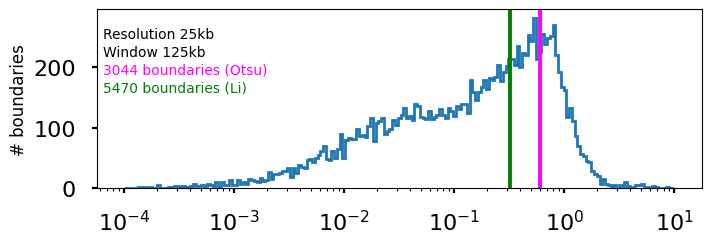

In [4]:
outDir = '../../figure/TAD'
os.makedirs(outDir, exist_ok=True)

# Import mcool files
coolDir = '../../cool/norm'
res = 25
clr_G1DMSO = cooler.Cooler(os.path.join(coolDir, 'G1.A485.Merged_' + str(res) + 'kb_KR.cool'))

# Import mcool files
#file_G1DMSO = '../../mcool/G1.DMSO.Merged.mcool'

# Custom insulation 
# Calculating insulation score
windows = [5*res*1000]

insulation_table_G1DMSO = insulation(clr_G1DMSO, windows, verbose=True, ignore_diags=2, nproc = 10)

# Applying Li & Otsu threshold to insulation strength
from skimage.filters import threshold_li, threshold_otsu

# NA value need to be masked for threshold functions since Otsu cannot handle NA
threshold_func_li = lambda x: threshold_li(x[np.isfinite(x)])
thresholding_func_li = lambda x: x >= threshold_func_li(x)
threshold_func_otsu = lambda x: threshold_otsu(x[np.isfinite(x)])
thresholding_func_otsu = lambda x: x >= threshold_func_otsu(x)

tables = [insulation_table_G1DMSO]

for table in tables:
    for win in windows:
        strong_boundaries = thresholding_func_li(table[f"boundary_strength_{win}"].values)
        table[f"is_boundary_{win}_li"] = strong_boundaries
        strong_boundaries = thresholding_func_otsu(table[f"boundary_strength_{win}"].values)
        table[f"is_boundary_{win}_otsu"] = strong_boundaries

        # Checking the cutoff
for table in tables:
    for win in windows:
        n_boundaries = table[f'is_boundary_{win}'].sum()
        n_boundaries_li = table[f'is_boundary_{win}_li'].sum()
        n_boundaries_otsu = table[f'is_boundary_{win}_otsu'].sum()
        print(n_boundaries, n_boundaries_li, n_boundaries_otsu)

        # Visualize insulation score and threshold with histogram

insulation_table_G1DMSO.to_csv(os.path.join(dataDir, 'TAD_boundaries_25kb_G1A485.tsv'), sep = '\t', index = False)
## PARAMETERS
histkwargs = dict(
    bins=10**np.linspace(-4,1,200
),
    histtype='step',
    lw=2,
)
thresholds_li = {}
thresholds_otsu = {}

## PLOTTING
# List of tables and their names
tables = [
    ("G1A485", insulation_table_G1DMSO)
]

# Plotting
for table_name, table in tables:
    f, axs = plt.subplots(len(windows), 1, sharex=True, figsize=(7, 7/3), constrained_layout=True)
    
    # Ensure axs is iterable
    if len(windows) == 1:
        axs = [axs]
    for i, (win, ax) in enumerate(zip(windows, axs)):
        ax.hist(
            table[f'boundary_strength_{win}'],
            **histkwargs
        )
        thresholds_li[win] = threshold_func_li(table[f"boundary_strength_{win}"].values)
        thresholds_otsu[win] = threshold_func_otsu(table[f"boundary_strength_{win}"].values)
        n_boundaries_li = (table[f'is_boundary_{win}_li']).sum()
        n_boundaries_otsu = (table[f'is_boundary_{win}_otsu']).sum()
        ax.axvline(thresholds_li[win], c='green')
        ax.axvline(thresholds_otsu[win], c='magenta')
        ax.text(0.01, 0.9,
                f'Resolution {res}kb',
                ha='left',
                va='top',
                transform=ax.transAxes)
        ax.text(0.01, 0.8,
                f'Window {win // 1000}kb',
                ha='left',
                va='top',
                transform=ax.transAxes)
        ax.text(0.01, 0.7,
                f'{n_boundaries_otsu} boundaries (Otsu)',
                c='magenta',
                ha='left',
                va='top',
                transform=ax.transAxes)
        ax.text(0.01, 0.6,
                f'{n_boundaries_li} boundaries (Li)',
                c='green',
                ha='left',
                va='top',
                transform=ax.transAxes)
        ax.set(
            xscale='log',
            ylabel='# boundaries'
        )
    for ax in axs:
        ax.set_ylabel('# boundaries', fontsize=12)
        
    f.savefig(os.path.join(outDir, f'Insulation_threshold_histogram_{table_name}_25kb.svg'), format='svg')
    f.savefig(os.path.join(outDir, f'Insulation_threshold_histogram_{table_name}_25kb.png'), format='png')

## Saving insulation score for other analysis

In [ ]:
outDir = '../../figure/TAD'
os.makedirs(outDir, exist_ok=True)
dataDir = '../../result/TAD'
coolDir = '../../cool/norm'

In [ ]:
# Import mcool files & calculating insulation score
res = 25
windows = [5*res*1000]

clr_G1DMSO = cooler.Cooler(os.path.join(coolDir, 'G1.DMSO.Merged_' + str(res) + 'kb_KR.cool'))
insulation_table_G1DMSO = insulation(clr_G1DMSO, windows, verbose=True, ignore_diags=2, nproc = 10)

In [7]:
insulation_table_G1DMSO.to_csv(os.path.join(dataDir, 'insulationScore_25kb_G1DMSO.tsv'), sep = '\t', index = False)

In [8]:
clr_G1dTAG = cooler.Cooler(os.path.join(coolDir, 'G1.dTAG.Merged_' + str(res) + 'kb_KR.cool'))
insulation_table_G1dTAG = insulation(clr_G1dTAG, windows, verbose=True, ignore_diags=2, nproc = 10)
insulation_table_G1dTAG.to_csv(os.path.join(dataDir, 'insulationScore_25kb_G1dTAG.tsv'), sep = '\t', index = False)

INFO:root:creating a Pool of 10 workers
INFO:root:Processing region chr3
INFO:root:Processing region chr2
INFO:root:Processing region chr4
INFO:root:Processing region chr1
INFO:root:Processing region chr6
INFO:root:Processing region chr7
INFO:root:Processing region chr8
INFO:root:Processing region chr5
INFO:root:Processing region chr10
INFO:root:Processing region chr9
INFO:root:Processing region chr11
INFO:root:Processing region chr12
INFO:root:Processing region chr13
INFO:root:Processing region chr14
INFO:root:Processing region chr15
INFO:root:Processing region chr16
INFO:root:Processing region chr17
INFO:root:Processing region chr18
INFO:root:Processing region chr19
INFO:root:Processing region chrM
INFO:root:Processing region chrX
INFO:root:Processing region chrY


In [9]:
clr_G1A485 = cooler.Cooler(os.path.join(coolDir, 'G1.A485.Merged_' + str(res) + 'kb_KR.cool'))
insulation_table_G1A485 = insulation(clr_G1A485, windows, verbose=True, ignore_diags=2, nproc = 10)
insulation_table_G1A485.to_csv(os.path.join(dataDir, 'insulationScore_25kb_G1A485.tsv'), sep = '\t', index = False)

INFO:root:creating a Pool of 10 workers
INFO:root:Processing region chr2
INFO:root:Processing region chr1
INFO:root:Processing region chr3
INFO:root:Processing region chr5
INFO:root:Processing region chr4
INFO:root:Processing region chr7
INFO:root:Processing region chr8
INFO:root:Processing region chr6
INFO:root:Processing region chr10
INFO:root:Processing region chr9
INFO:root:Processing region chr11
INFO:root:Processing region chr12
INFO:root:Processing region chr13
INFO:root:Processing region chr14
INFO:root:Processing region chr15
INFO:root:Processing region chr16
INFO:root:Processing region chr17
INFO:root:Processing region chr18
INFO:root:Processing region chr19
INFO:root:Processing region chrM
INFO:root:Processing region chrX
INFO:root:Processing region chrY
